<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%207/Le%C3%A7on_7_sobel.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Filter demo

This notebook will demonstrate how to build typical image processing filters and how to apply them.

Import modules and load image

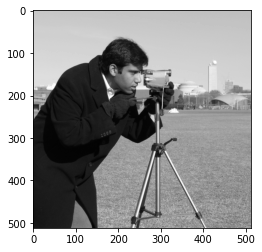

In [1]:
import numpy as np
import skimage
import skimage.filters
import scipy.signal
import matplotlib.pyplot as plt

image = skimage.data.camera()

plt.imshow(image, cmap=plt.cm.gray)
plt.show()

## Prewitt filter

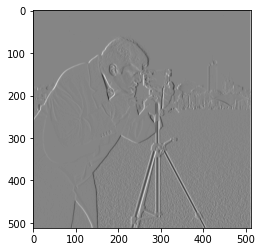

In [ ]:
# Define Prewitt filter (along x)
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Convolve image with filter
# Note: We use mode='same' to keep the same dimension between input and output image.
image_prewitt_x = scipy.signal.convolve2d(image, prewitt_x, mode='same')

plt.imshow(image_prewitt_x, cmap=plt.cm.gray)
plt.show()

We observe that contours oriented horizontally are enhanced by this filter.

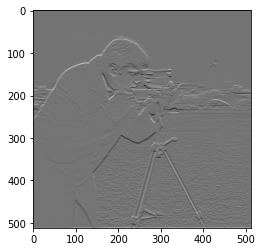

In [ ]:
# Transpose filter to obtain filter along y
prewitt_y = prewitt_x.transpose()

# Convolve image with Sobel filter
image_prewitt_y = scipy.signal.convolve2d(image, prewitt_y, mode='same')

plt.imshow(image_prewitt_y, cmap=plt.cm.gray)
plt.show()

We observe that vertical contours are enhanced. Now, let's combine both X and Y outputs.

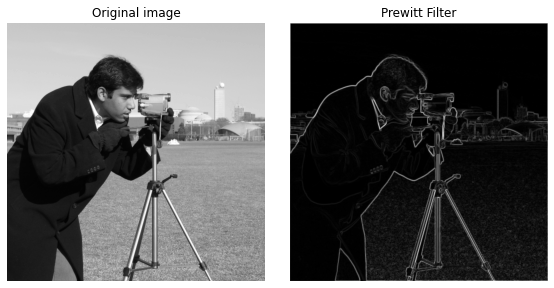

In [ ]:
# Compute the L2 norm of both images
image_prewitt_xy = np.sqrt(np.square(image_prewitt_x) + np.square(image_prewitt_y))
 
# Normalize to 255 (8 bits)
image_prewitt_xy *= 255.0 / image_prewitt_xy.max()

# Display
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original image')
axes[1].imshow(image_prewitt_xy, cmap=plt.cm.gray)
axes[1].set_title('Prewitt Filter')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

## Sobel filter


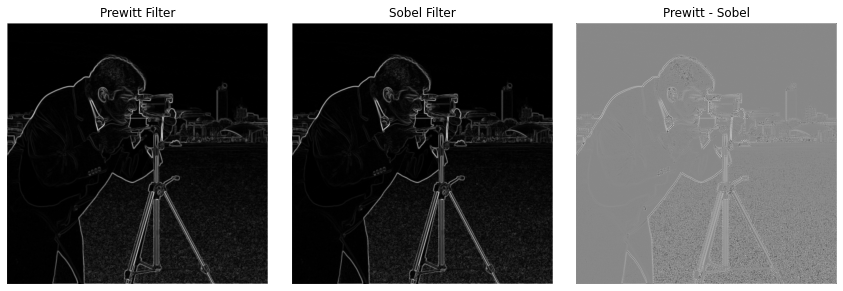

diff_min: -21.893793216201573, diff_max: 19.392663949073764


In [ ]:
# Define Sobel filter
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_x.transpose()

# Convolve image with filter
image_sobel_x = scipy.signal.convolve2d(image, sobel_x, mode='same')
image_sobel_y = scipy.signal.convolve2d(image, sobel_y, mode='same')

# Compute the L2 norm of both images
image_sobel_xy = np.sqrt(np.square(image_sobel_x) + np.square(image_sobel_y))
image_sobel_xy *= 255.0 / image_sobel_xy.max()

# Compare Prewitt and Sobel
image_diff = image_prewitt_xy - image_sobel_xy
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12, 4))
axes[0].imshow(image_prewitt_xy, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Filter')
axes[1].imshow(image_sobel_xy, cmap=plt.cm.gray)
axes[1].set_title('Sobel Filter')
axes[2].imshow(image_diff, cmap=plt.cm.gray)
axes[2].set_title('Prewitt - Sobel')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Compute min/max difference
print('diff_min: {}, diff_max: {}'.
      format(image_diff.min(), image_diff.max()))

We notice the difference mainly comes from diagonal contours. Also see [Adlakha et al., Analytical Comparison between Sobel and
Prewitt Edge Detection Techniques](https://www.ijser.org/researchpaper/Analytical-Comparison-between-Sobel-and-Prewitt-Edge-Detection-Techniques.pdf).

## Use scikit-image

Most popular filters are already implemented in scikit-image. In general, for production code, it is recommended to use existing open-source implementation because (i) these are widely validated and continuously tested and (ii) there is no point in re-inventing the wheel.

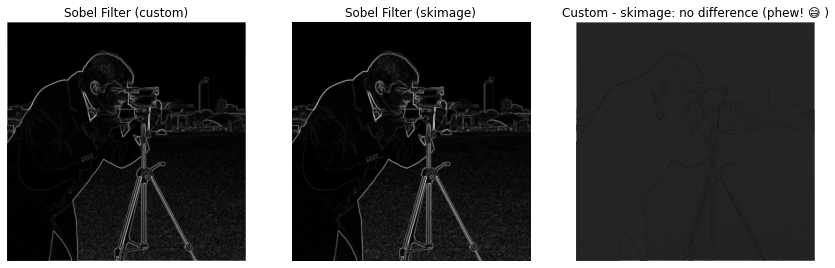

diff_min: -40.34186214156439, diff_max: 239.68914021732616


In [ ]:
# Sobel filtering with scikit-image
image_sobel_xy_skimage = skimage.filters.sobel(image)
# image_sobel_y = skimage.filters.sobel_v(image)

# Compute the L2 norm
#image_sobel_xy_skimage = np.sqrt(np.square(image_sobel_x) + np.square(image_sobel_y))
image_sobel_xy_skimage *= 255.0 / image_sobel_xy_skimage.max()

# Compare custom and scikit-image results
image_diff = image_sobel_xy - image_sobel_xy_skimage
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12, 4))
axes[0].imshow(image_sobel_xy, cmap=plt.cm.gray)
axes[0].set_title('Sobel Filter (custom)')
axes[1].imshow(image_sobel_xy_skimage, cmap=plt.cm.gray)
axes[1].set_title('Sobel Filter (skimage)')
axes[2].imshow(image_diff, cmap=plt.cm.gray)
axes[2].set_title('Custom - skimage: no difference (phew! 😅 )')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()
print('diff_min: {}, diff_max: {}'.
      format(image_diff.min(), image_diff.max()))

For more fun with image filters, I recommend the excellent documentation on the [scikit-image website](https://scikit-image.org/).